###### Текст распространяется на условиях лицензии Creative Commons Attribution license CC-BY 4.0, код — на условиях лицензии MIT license.  (c)2015 L.A. Barba, Pi-Yueh Chuang, Natalia Clementi.

##### Версия 0.1 -- Апрель 2018

# Панельный метод вихрей-источников

В [девятом занятии](09_Lesson09_flowOverCylinder.ipynb) курса _AeroPython_ вы узнали, как при помощи панельного метода источников получить обтекание кругового цилиндра, а в [десятом занятии](10_Lesson10_sourcePanelMethod.ipynb) использовали тот же метод для симметричного профиля под нулевым углом атаки. Но что делать, если нужно, чтобы профиль создавал подъемную силу? Если расположить профиль под углом атаки к набегающему потоку, подъемная сила обязательно появится, но получим ли мы ее, используя панельный метод источников? Поминте [теорему Кутты-Жуковского](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%81%D1%82%D1%83%D0%BB%D0%B0%D1%82_%D0%96%D1%83%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%E2%80%94_%D0%A7%D0%B0%D0%BF%D0%BB%D1%8B%D0%B3%D0%B8%D0%BD%D0%B0)?


Исторически, первым панельным методом был метод слоя источников. В то время компания Douglas Aircraft была озабочена расчетом течения около тел вращения, и только позднее, этот способ был обобщен для несущих поверхностей. (Ниже приведена ссылка на исторический обзор.)

*Панельный метод источников* дает решение без циркуляции, а значит и без подъемной силы. Цель этого занятия состоит в том, чтобы, начав с панельного метода источников, реализованного на предыдущем занятии, добавить в него немного *циркуляции*. Будет введено важное понятие **условие Кутты-Жуковского**, благодаря которому можно определить необходимое значение циркуляции.

##### Ссылки

* Smith, A.M.O., The Panel Method: Its Original Development. Глава в  _Applied Computational Aerodynamics_, Vol. 125, edited by P.A. Henne, published by AIAA (1990). [Доступно на Google Books.](http://books.google.com/books?id=5Ov2tHj0wxoC&lpg=PA3&ots=SnUiqcdEnb&dq=The%20Panel%20Method%3A%20Its%20Original%20Development&pg=PA3#v=onepage&q&f=false)

## Панельный метод для несущего тела

Если просто увеличить угол атаки набегающего потока и рассчитать течение панельным методом источников, задняя точка торможения не будет располагаться на задней кромке профиля. Вместо этого, поток будет огибать заднюю кромку, и точка торможения переместится куда-то на верхнюю поверхность пофиля. Такое решение нефизчно.

Например, если воспользоваться методом источников из [занятия 10](10_Lesson10_sourcePanelMethod.ipynb) с углом атаки $\alpha=4^\circ$ (используем 40 панелей) и изобразить получившиеся линии тока в районе задней кромки, то мы увидим такую картину:

<center><img src="./resources/StreamlinesTrailingEdge.png" width="600"></center>

Как видно, на задней кромке линии тока ведут себя довольно странно. Экспериментально установлено, что поток обтекает заднюю кромку профиля плавно, поэтому полученное нами решение неверно. Что не так?  Для расчета потенциального обтекания профиля под ненулевым углом атаки нельзя использовать только источники — нужна циркуляция. Но как ее получить?

## Условие Кутты-Жуковского

Согласно условию Кутты-Жуковского, давление на верхней и нижней поверхностях профиля в районе задней кромки должно быть одинаковым, при этом поток не огибает заднюю кромку, а сходит с нее по касательной. Задняя точка торможения располагается точно на задней кромке профиля.

Это, естественно, слегка озадачивает. Как обосновать такое, казалось бы, произвольное условие? Вспомним, что теория потенциальных течений полностью игнорирует вязкость жидкости, и поскольку мы оставляем за бортом важный физический эффект, нас не должно смущать, что получившаяся из таких предпосылок теория, требует некоторой настройки в случаях, когда вязкость играет важную роль. В реальности вязкая жидкость не может безотрывно развернуться вокруг острого угла, как в случае с задней кромкой крыла. Условие Кутты-Жуковского подправляет теорию потенциальных течений таким образом, чтобы решение приблизолось к ральности.

Вспомните [шестое занятие](06_Lesson06_vortexLift.ipynb), в котором мы изучали подъемную силу цилиндра, комбинируя диполь с набегающим потоком и вихрем. Тогда мы выучили, что **для создания подъемной силы всегда нужна циркуляция**. Если вы экспериментировали с величиной циркуляции точечного вихря (а вы экспериментировали, правда же?), то обнаружили, что точки торможения перемещаются по цилиндру.

В случае обтекания профиля, так же как и в случае кругового цилиндра, добавление циркуляции будет перемещать точку торможения по поверхности. И если добавить нужное количество циркуляции, можно сделать так, чтобы точка торможения оказалась на задней кромке профиля. Такая величина циркуляции сделает решение физичным. А также создаст нужную подъемную силу!

Для реализации условия Кутты-Жуковского в нашем панельном методе нужно добавить в систему уравнений еще одно уравнение, решение которого позволит получить значение циркуляции, необходимое для перемещения точки торможения на заднюю кромку профиля. Поместив на каждую панель вихревой слой с одинаковой постоянной интенсивностью, мы добавим к течению циркуляцию, при этом получив одну дополнительную неизвестную. 

Как это оформть в виде кода? Мы можем повторно использовать большую часть кода из [урока 10](10_Lesson10_sourcePanelMethod.ipynb), и применять условие Кутты-Жуковского при добавлении циркуляции к потоку. Прежде мы разбивали геометрию на `N` панелей с источниками постоянной интенсивности (которая, однако, менялась от панели к панели) и требовали выполнения граничного условия Неймана для касательной компоненты скорости в каждом из `N` центров панелей. В результате получалась система `N` линейных уравнений с `N` неизвестными, которую мы решали при помощи функции `linalg.solve` библиотеки SciPy. В случае же несущего тела, мы получим `N+1` уравнение с `N+1` неизвестной. Читайте дальше, чтобы узнать как мы это сделаем!

### Разбиение на панели

Давайте быстро выполним все приготовления. Нужно импортировать наши любимые библиотеки и функцию `integrate` из SciPy, как и в занятии 10.

In [1]:
# импортируем нужные библиотеки и модули
import os
import numpy
from scipy import integrate, linalg
from matplotlib import pyplot

# вставляем графику в блокнот
%matplotlib inline

Начнем с зачитывания геометрии профиля NACA0012 из файла с данными и нарисуем получившийся профиль:

In [2]:
# загружаем геометрию из файла с данными
naca_filepath = os.path.join('resources', 'naca0012.dat')
with open(naca_filepath, 'r') as infile:
    x, y = numpy.loadtxt(infile, dtype=float, unpack=True)

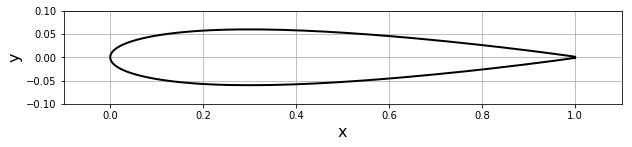

In [3]:
# рисуем геометрию
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

Линию, определяющую профиль, разобьем на `N` панелей, используя тот же подход, что и в [занятии 10](10_Lesson10_sourcePanelMethod.ipynb).

Далее определим класс `Panel`, в котором будет содержаться вся информация о панели: начальная и конечная точки, центр, ориентация, длина, интенсивность источника, касательная компонента скорости и коэффициент давления. Интенсивность вихревого слоя мы хранить не будем, поскольку она одинакова для всех панелей.

In [4]:
class Panel:
    """
    Contains information related to a panel.
    """
    def __init__(self, xa, ya, xb, yb):
        """
        Initializes the panel.
        
        Sets the end-points and calculates the center-point, length,
        and angle (with the x-axis) of the panel.
        Defines if the panel is located on the upper or lower surface of the geometry.
        Initializes the source-strength, tangential velocity, and pressure coefficient
        of the panel to zero.
        
        Parameters
        ---------_
        xa: float
            x-coordinate of the first end-point.
        ya: float
            y-coordinate of the first end-point.
        xb: float
            x-coordinate of the second end-point.
        yb: float
            y-coordinate of the second end-point.
        """
        self.xa, self.ya = xa, ya # начальная точка панели
        self.xb, self.yb = xb, yb # конечная точка панели
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2         # центр панели
        self.length = numpy.sqrt((xb-xa)**2+(yb-ya)**2) # длина панели
        
        # ориентация панели (угол между нормалью и осью x)
        if xb-xa <= 0.0:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa > 0.0:
            self.beta = numpy.pi + numpy.arccos(-(yb-ya)/self.length)
        
        # расположение панели
        if self.beta <= numpy.pi:
            self.loc = 'upper' # верхняя поверхность
        else:
            self.loc = 'lower' # нижняя поверхность
        
        self.sigma = 0.0 # интенсивность источника
        self.vt = 0.0    # касательная скорость
        self.cp = 0.0    # коэффициент давления

Как и ранее, для разбиения геометрии профиля на `N` панелей, вызовем функцию `define_panels` Эта функция возвращает NumPy массив, состоящий из `N` объектов типа `Panel`.

In [5]:
def define_panels(x, y, N=40):
    """
    Discretizes the geometry into panels using 'cosine' method.
    
    Parameters
    ----------
    x: 1D array of floats
        x-coordinate of the points defining the geometry.
    y: 1D array of floats
        y-coordinate of the points defining the geometry.
    N: integer, optional
        Number of panels;
        default: 40.
    
    Returns
    -------
    panels: 1D Numpy array of Panel objects.
        The list of panels.
    """
    
    R = (x.max()-x.min())/2.0        # радиус окружности
    x_center = (x.max()+x.min())/2.0 # x-координата центра
    
    theta = numpy.linspace(0.0, 2.0*numpy.pi, N+1) # массив углов
    x_circle = x_center +  R*numpy.cos(theta)      # x-координаты точек окружности
    
    x_ends = numpy.copy(x_circle)     # x-координаиты конечных точек панелей
    y_ends = numpy.empty_like(x_ends) # y-координаиты конечных точек панелей
    
    # добавляем точку, чтобы получить замкнутую линию
    x, y = numpy.append(x, x[0]), numpy.append(y, y[0])
    
    # вычисляем y-координаты конечных точек при помощи проецирования
    I = 0
    for i in range(N):
        while I < len(x)-1:
            if (x[I] <= x_ends[i] <= x[I+1]) or (x[I+1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I+1]-y[I])/(x[I+1]-x[I])
        b = y[I+1] - a*x[I+1]
        y_ends[i] = a*x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    # создаем панели
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
    return panels

Теперь можно воспользоваться новыми функциями: создать геометрию, разбить ее на панели и нарисовать получившееся распределение узлов.

In [6]:
# разбиваем геометрию на панели
panels = define_panels(x, y, N=40)

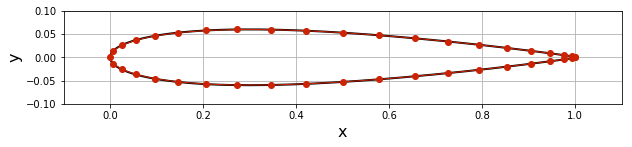

In [7]:
# рисуем дискретизированую геометрию
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels], panels[0].xa),
            numpy.append([panel.ya for panel in panels], panels[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, \
            color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

### Параметры набегающего потока

Профиль помещен в поток с характеристиками $(U_\infty$,$\alpha)$, где  $U_\infty$ и $\alpha$ — скорость на бесконечности и угол атаки соответственно. Как и раньше, мы создадим класс для свободного потока, хоть у нас и будет только один объект этого класса. Зато потом так будет проще передавать параметры набегающего потока в другие функции.

In [8]:
class Freestream:
    """
    Freestream conditions.
    """
    def __init__(self, u_inf=1.0, alpha=0.0):
        """
        Sets the freestream speed and angle (in degrees).
        
        Parameters
        ----------
        u_inf: float, optional
            Freestream speed;
            default: 1.0.
        alpha: float, optional
            Angle of attack in degrees;
            default 0.0.
        """
        self.u_inf = u_inf
        self.alpha = alpha*numpy.pi/180.0 # градусы в радианы

In [9]:
# задаем параметры набегающего потока
freestream = Freestream(u_inf=1.0, alpha=4.0)

### Граничное условие для потока на поверхности тела

К каждой панели добавляется вихрь с интенсивностью $\gamma$.  Тогда, согласно принципу суперпозиции, потенциал скорости записывается в виде:

$$
\begin{align*}
\phi\left(x_{c_i},y_{c_i}\right) &= V_\infty x_{c_i} \cos \alpha + V_\infty y_{c_i} \sin \alpha \\
&+ \sum_{j=1}^N \frac{\sigma_j}{2\pi} \int_j \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) {\rm d}s_j \\
&- \sum_{j=1}^N \frac{\gamma}{2\pi} \int_j \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right) {\rm d}s_j
\end{align*}
$$

Условие касательности потока записывается для центра каждой панели:

$$0 = \vec{V}\cdot\vec{n}_i = \frac{\partial}{\partial n_i} \left\{ \phi\left(x_{c_i},y_{c_i}\right) \right\}$$

то есть

$$
\begin{align*}
0 &= V_\infty \cos \left(\alpha-\beta_i\right) + \frac{\sigma_i}{2} \\
&+ \sum_{j=1,j\neq i}^N \frac{\sigma_j}{2\pi} \int_j \frac{\partial}{\partial n_i} \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) {\rm d}s_j \\
&- \sum_{j=1,j\neq i}^N \frac{\gamma}{2\pi} \int_j \frac{\partial}{\partial n_i} \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right) {\rm d}s_j
\end{align*}
$$

На предыдущем занятии мы уже работали с первым интегралом:

$$\frac{\partial}{\partial n_i} \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) = \frac{\left(x_{c_i}-x_j\right)\frac{\partial x_{c_i}}{\partial n_i} + \left(y_{c_i}-y_j\right)\frac{\partial y_{c_i}}{\partial n_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2}$$

где $\frac{\partial x_{c_i}}{\partial n_i} = \cos \beta_i$ и $\frac{\partial y_{c_i}}{\partial n_i} = \sin \beta_i$, и

$$x_j(s_j) = x_{b_j} - s_j \sin \beta_j$$

$$y_j(s_j) = y_{b_j} + s_j \cos \beta_j$$

Теперь нам нужно вывести последний интеграл в уравнении для граничного условия:

$$\frac{\partial}{\partial n_i} \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right)= \frac{\left(x_{c_i}-x_j\right)\frac{\partial y_{c_i}}{\partial n_i} - \left(y_{c_i}-y_j\right)\frac{\partial x_{c_i}}{\partial n_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2}$$

где $\frac{\partial x_{c_i}}{\partial n_i} = \cos \beta_i$ и $\frac{\partial y_{c_i}}{\partial n_i} = \sin \beta_i$.

### Выполнение условия Кутты-Жуковского

Для выполнения *условия Кутты-Жуковского* потребуем, чтобы коэффициенты давления на первой и последней панелях совпадали:

$$C_{p_1} = C_{p_{N}}$$

Исходя из определения коэффициента давления $C_p = 1-\left(\frac{V}{U_\infty}\right)^2$, условие Кутты-Жуковского подразумевает, что величины скоростей в центрах первой и последней панелей должны совпадать:

$$V_1^2 = V_N^2$$

Поскольку условие непротекания требует, чтобы $V_{n_1} = V_{n_N} = 0$, мы приходим к следующей формулировке *условия Кутты-Жуковского*:

$$V_{t_1} = - V_{t_N}$$

(знак "минус" обусловлени выбором осей для определения нормального и касательного направлений).

Получим выражение для касательных компонент скорости на каждой панели, это потребуется нам позже для вычисления коэффициента давления.

$$V_{t_i} = \frac{\partial}{\partial t_i} \left(\phi\left(x_{c_i},y_{c_i}\right)\right)$$

то есть

$$
\begin{align*}
V_{t_i} &= V_\infty \sin \left(\alpha-\beta_i\right) \\
&+ \sum_{j=1,j\neq i}^N \frac{\sigma_j}{2\pi} \int_j \frac{\partial}{\partial t_i} \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) {\rm d}s_j \\
&- \sum_{j=1,j\neq i}^N \frac{\gamma}{2\pi} \int_j \frac{\partial}{\partial t_i} \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right) {\rm d}s_j \\
&-\frac{\gamma}{2}
\end{align*}
$$


что дает

$$
\begin{align*}
V_{t_i} &= V_\infty \sin \left(\alpha-\beta_i\right) \\
&+ \sum_{j=1,j\neq i}^N \frac{\sigma_j}{2\pi} \int_j \frac{\left(x_{c_i}-x_j\right)\frac{\partial x_{c_i}}{\partial t_i} + \left(y_{c_i}-y_j\right)\frac{\partial y_{c_i}}{\partial t_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2} {\rm d}s_j \\
&- \sum_{j=1,j\neq i}^N \frac{\gamma}{2\pi} \int_j \frac{\left(x_{c_i}-x_j\right)\frac{\partial y_{c_i}}{\partial t_i} - \left(y_{c_i}-y_j\right)\frac{\partial x_{c_i}}{\partial t_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2} {\rm d}s_j \\
&-\frac{\gamma}{2}
\end{align*}
$$

где $\frac{\partial x_{c_i}}{\partial t_i} = -\sin \beta_i$ и $\frac{\partial y_{c_i}}{\partial t_i} = \cos \beta_i$.

## Построение системы линейных уравнений

В этом разделе мы составим и решим систему линейных уравнений в виде

$$[A][\sigma,\gamma] = [b]$$

где матрица $[A]$ размерности $N+1 \times N+1$ состоит из трех блоков: матрицы источников размерности $N \times N$ (такая же, как в занятии 10), массива вихрей $N \times 1$ , в котором хранятся весовые коэффициенты переменной $\gamma$ каждой панели и массива $1 \times N+1$, соответсвтующего условию Кутты-Жуковского.

Мы собираемся повторно использовать функцию `integral` из [занятия 10](10_Lesson10_sourcePanelMethod.ipynb) для вычисления различных интегралов с помощью SciPy функции `integrate.quad`:

In [10]:
def integral(x, y, panel, dxdk, dydk):
    """
    Evaluates the contribution from a panel at a given point.
    
    Parameters
    ----------
    x: float
        x-coordinate of the target point.
    y: float
        y-coordinate of the target point.
    panel: Panel object
        Panel whose contribution is evaluated.
    dxdk: float
        Value of the derivative of x in a certain direction.
    dydk: float
        Value of the derivative of y in a certain direction.
    
    Returns
    -------
    Contribution from the panel at a given point (x, y).
    """
    def integrand(s):
        return ( ((x - (panel.xa - numpy.sin(panel.beta)*s))*dxdk
                  +(y - (panel.ya + numpy.cos(panel.beta)*s))*dydk)
                / ((x - (panel.xa - numpy.sin(panel.beta)*s))**2
                   +(y - (panel.ya + numpy.cos(panel.beta)*s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

Сначала определим функцию `source_contribution_normal` для создания матрицы источник в нормальную компоненту скорости каждой панели:

In [11]:
def source_contribution_normal(panels):
    """
    Builds the source contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Source contribution matrix.
    """
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # вклад рассматриваемой панели в общее поле источников
    numpy.fill_diagonal(A, 0.5)
    # вклад остальных панелей
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                panel_j,
                                                numpy.cos(panel_i.beta),
                                                numpy.sin(panel_i.beta))
    return A

Затем, определим `vortex_contribution_normal` для создания матрицы вихрей:

In [12]:
def vortex_contribution_normal(panels):
    """
    Builds the vortex contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Vortex contribution matrix.
    """
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # вклад от рассматриваемой панели в поле вихря
    numpy.fill_diagonal(A, 0.0)
    # вихревой вклад от всех остальных панелей
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = -0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                 panel_j,
                                                 numpy.sin(panel_i.beta),
                                                 -numpy.cos(panel_i.beta))
    return A

Вызовем обе эти функции для создания матрицы источников `A_source` и вихрей `B_vortex`:

In [13]:
A_source = source_contribution_normal(panels)
B_vortex = vortex_contribution_normal(panels)

Остается добавить условие Кутты-Жуковского в нашу систему уравнений.

После этого занятия будет еще [упражнение](11_Lesson11_Exercise.ipynb), которое поможет вам убедиться в том, что:

* матрица, соответствующая вкладам вихрей в нормальную компоненту скорости $B^n$, **в точности** равна матрице, соответствующей вкладам источников в касательную компоненту скорости $A^t$, то есть:

$$B^n_{ij}=A^t_{ij} \quad \forall (i, j) \in \{1, \cdots, N\}^2$$

* матрица, соответсвующая вкладам вихрей в касательную компоненту скорости $B^t$, **противоположна** по знаку матрице, соответствующей вкладам источников в нормальную компоненту скорости $A^n$, то есть:

$$B^t_{ij}=-A^n_{ij} \quad \forall (i, j) \in \{1, \cdots, N\}^2$$

где индексы $n$ и $t$ обозначают нормальную и касательную компоненты скорости соответсвенно.

Таким образом, условие Кутты-Жуковского можно сформулировать в следующем виде

$$
\begin{bmatrix}
(A^t_{11}+A^t_{N1}) \\
\vdots \\
(A^t_{1N}+A^t_{NN}) \\
\left( \sum_{j=1}^N (B^t_{1j}+B^t_{Nj}) \right)
\end{bmatrix}^T
\begin{bmatrix}
\sigma_1 \\
\vdots \\
\sigma_N \\
\gamma
\end{bmatrix}
=
-(b^t_1+b^t_N)
$$

Определим функцию `kutta_condition`, которая сделает всю работу за нас:


In [14]:
def kutta_condition(A_source, B_vortex):
    """
    Builds the Kutta condition array.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    b: 1D Numpy array of floats
        The left-hand side of the Kutta-condition equation.
    """
    b = numpy.empty(A_source.shape[0]+1, dtype=float)
    # матрица вкладов источников в тангенциальную составляющую скорости
    # равна
    # матрице вкладов вихрей в нормальную составляющую скорости
    b[:-1] = B_vortex[0, :] + B_vortex[-1, :]
    # матрица вкладов вихрей в тангенциальную составляющую скорости
    # противоположна по знаку
    # матрице вкладов источников в нормальную составляющую скорости
    b[-1] = - numpy.sum(A_source[0, :] + A_source[-1, :])
    return b

Теперь у нас есть все необходимые ингредиенты.  Функция `build_singularity_matrix` соберет вместе матрицы источников, вихрей и условия Кутты-Жуковского и сформирует матрицу, необходимую для решения системы линейных уравнений.

In [15]:
def build_singularity_matrix(A_source, B_vortex):
    """
    Builds the left-hand side matrix of the system
    arising from source and vortex contributions.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    A:  2D Numpy array of floats
        Matrix of the linear system.
    """
    A = numpy.empty((A_source.shape[0]+1, A_source.shape[1]+1), \
                    dtype=float)
    # матрица источников
    A[:-1, :-1] = A_source
    # матрица вихрей
    A[:-1, -1] = numpy.sum(B_vortex, axis=1)
    # условие Кутты-Жуковского
    A[-1, :] = kutta_condition(A_source, B_vortex)
    return A

В правой стороне уравнения содержится все, что не зависит от неизвестных интенсивностей.

In [16]:
def build_freestream_rhs(panels, freestream):
    """
    Builds the right-hand side of the system 
    arising from the freestream contribution.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    
    Returns
    -------
    b: 1D Numpy array of floats
        Freestream contribution on each panel and on the Kutta condition.
    """
    b = numpy.empty(panels.size+1,dtype=float)
    # вклад от набегающего потока в каждую панель
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * numpy.cos(freestream.alpha - panel.beta)
    # вклад от набегающего потока в условие Кутты-Жуковского
    b[-1] = -freestream.u_inf*( numpy.sin(freestream.alpha-panels[0].beta)
                               +numpy.sin(freestream.alpha-panels[-1].beta) )
    return b

In [17]:
A = build_singularity_matrix(A_source, B_vortex)
b = build_freestream_rhs(panels, freestream)

Как и на предыдущем занятии, систему линейных уравнений будем решать при помщи SciPy функции `linalg.solve`. Затем мы сохраним результаты в атрибуте `sigma` каждого объетка класса `Panel`. Мы также создадим переменную `gamma`, в которой будет храниться постоянная интенсивность вихря.

In [20]:
# рассчитываем интенсивности источников и вихря
strengths = numpy.linalg.solve(A, b)

# заполняем интенсивности на кажой панели
for i , panel in enumerate(panels):
    panel.sigma = strengths[i]
    
# запоминаем циркуляцию
gamma = strengths[-1]

## Коэффициент давления на поверхности

Коэффициент давления в центре $i$-ой панели:

$$C_{p_i} = 1 - \left(\frac{V_{t_i}}{U_\infty}\right)^2$$

Итак, нужно вычислить касательную компоненту скорости в центре каждой панели, при помощи функции `compute_tangential_velocity`:

In [21]:
def compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex):
    """
    Computes the tangential surface velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    gamma: float
        Circulation density.
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    """
    A = numpy.empty((panels.size, panels.size+1), dtype=float)
    # матрица вкладов источников в тангенциальную составляющую скорости
    # равна
    # матрице вкладов вихрей в нормальную составляющую скорости
    A[:, :-1] = B_vortex
    # матрица вкладов вихрей в тангенциальную составляющую скорости
    # противоположна по знаку
    # матрице вкладов источников в нормальную составляющую скорости
    A[:, -1] = -numpy.sum(A_source, axis=1)
    # добавляем набегающий поток
    b = freestream.u_inf*numpy.sin([freestream.alpha-panel.beta 
                                    for panel in panels])
    
    strengths = numpy.append([panel.sigma for panel in panels], gamma)
    
    tangential_velocities = numpy.dot(A, strengths) + b
    
    for i, panel in enumerate(panels):
        panel.vt = tangential_velocities[i]

In [22]:
# касательная компонента скорости на каждой панели
compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)

И еще определим функцию `compute_pressure_coefficient`, чтобы вычислить коэффициент давления на поверхности:

In [23]:
def compute_pressure_coefficient(panels, freestream):
    """
    Computes the surface pressure coefficients.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    """
    for panel in panels:
        panel.cp = 1.0 - (panel.vt/freestream.u_inf)**2

In [24]:
# коэффициент давления на поверхности
compute_pressure_coefficient(panels, freestream)

Пора рисовать результат!

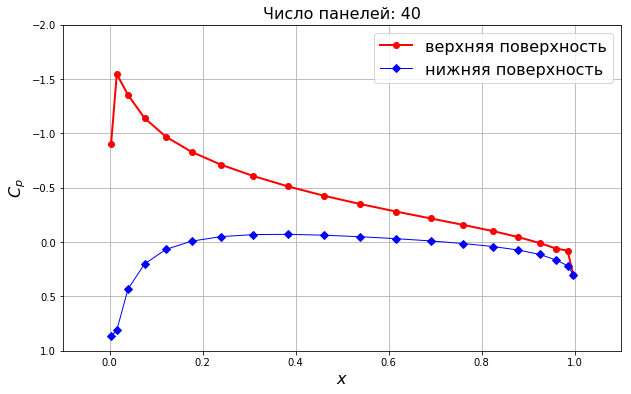

In [25]:
# рисуем коэффициент давления на поверхности
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'upper'],
            [panel.cp for panel in panels if panel.loc == 'upper'],
            label='верхняя поверхность',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'lower'],
            [panel.cp for panel in panels if panel.loc == 'lower'],
            label= 'нижняя поверхность',
            color='b', linestyle='-', linewidth=1, marker='D', markersize=6)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(1.0, -2.0)
pyplot.title('Число панелей: {}'.format(panels.size), fontsize=16);

### Проверка точности

Для замкнутого тела суммарная интенсивность всех источников должна равняться нулю. В противном случае тело добавляло бы в поток какую-то массу, или наоборот, что-то забирало бы. Поэтому, должно выполняться

$$\sum_{i=1}^{N} \sigma_i l_i = 0$$

где $l_i$ — длина $i^{\text{ой}}$ панели.

Зная это, можно получить оценку точности панельного метода источников.

In [26]:
# вычисляем точность
accuracy = sum([panel.sigma*panel.length for panel in panels])
print('суммарная интенсивность особенностей: {:0.6f}'.format(accuracy))

суммарная интенсивность особенностей: 0.004606


## Коэффициент подъемной силы 

Подъемная сила определяется по теореме Кутты-Жукоского: $L = \rho \Gamma U_\infty$,
где $\rho$ — плотность жидкости. Общая циркуляция $\Gamma$ получается как сумма циркуляций:

$$\Gamma = \sum_{i=1}^N \gamma l_i$$

Наконец, коэффициент подъемной силы определяется по формуле:

$$C_l = \frac{\sum_{i=1}^N \gamma l_i}{\frac{1}{2}U_\infty c}$$

в которой $c$ — хорда профиля.

In [27]:
# вычисляем хорду и коэффициент подъемной силы
c = abs(max(panel.xa for panel in panels)
        - min(panel.xa for panel in panels))
cl = (gamma*sum(panel.length for panel in panels)
      / (0.5*freestream.u_inf*c))
print('коэффициент подъемной силы: CL = {:0.3f}'.format(cl))

коэффициент подъемной силы: CL = 0.506


### Контрольное задание

Основываясь на том, что было сделано в предыдущем блокноте, рассчитайте и изобразите линии тока и коэффициент давления на декартовой сетке.

---

In [26]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()